# Analyzing and Visualizing Penguin Data with ggplot2
## Data Analysis and Visualization using the **palmerpenguins** dataset in R

In this notebook, I leverage the data analysis and visualization techniques using **dplyr** and **ggplot**, and I explore and uncover insights from the **palmerpenguins** dataset through compelling visualizations.

### Background
The palmerpenguins dataset is a collection of data about penguins from the Palmer Archipelago in Antarctica. It was created by researchers from the Palmer Station, Antarctica, which is part of a long-term ecological research project. The dataset includes 344 observations of three penguin species: Adélie, Chinstrap, and Gentoo. It includes variables such as species, island location, bill length, bill depth, flipper length, body mass, and sex.

### Setup and library imports
The list of packages that need to be installed and libraries that need to be loaded for the analysis.

In [2]:
# install necessary libraries
install.packages(c("ggplot2", "palmerpenguins", "tidyverse"))
install.packages("corrgram")
install.packages("DataExplorer")
install.packages("naniar")


The downloaded binary packages are in
	/var/folders/pl/77yqs8ws78z445jd6qd59vtr0000gn/T//Rtmp89w3ip/downloaded_packages

The downloaded binary packages are in
	/var/folders/pl/77yqs8ws78z445jd6qd59vtr0000gn/T//Rtmp89w3ip/downloaded_packages

The downloaded binary packages are in
	/var/folders/pl/77yqs8ws78z445jd6qd59vtr0000gn/T//Rtmp89w3ip/downloaded_packages

The downloaded binary packages are in
	/var/folders/pl/77yqs8ws78z445jd6qd59vtr0000gn/T//Rtmp89w3ip/downloaded_packages


In [3]:
# load libraries
library(palmerpenguins)
library(ggplot2)
library(tidyverse)
library(corrgram)
library(DataExplorer)
library(naniar)

# setting ggplot dimensions
options(repr.plot.width = 18, repr.plot.height = 6)

── Attaching core tidyverse packages ───────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ─────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Dataset Overview
### Summary Statistics
A brief overview of the dataset, including summary statistics and an inspection of the columns and first few rows.

In [51]:
# message("Glimpse:")
# glimpse(penguins)

message("Summary:")
summary(penguins)

message("Structure:")
str(penguins)

cat("Preview 5 records from the dataset.")
head(penguins, 5)

cat("Total Observations:")
print(penguins |> group_by(sex) |> count())

Summary:



      species          island    bill_length_mm  bill_depth_mm  
 Adelie   :152   Biscoe   :168   Min.   :32.10   Min.   :13.10  
 Chinstrap: 68   Dream    :124   1st Qu.:39.27   1st Qu.:15.60  
 Gentoo   :124   Torgersen: 52   Median :44.45   Median :17.30  
                                 Mean   :43.92   Mean   :17.15  
                                 3rd Qu.:48.50   3rd Qu.:18.70  
                                 Max.   :59.60   Max.   :21.50  
 flipper_length_mm  body_mass_g       sex           year     
 Min.   :172.0     Min.   :2700   female:165   Min.   :2007  
 1st Qu.:190.0     1st Qu.:3550   male  :168   1st Qu.:2007  
 Median :197.0     Median :4050   NA's  : 11   Median :2008  
 Mean   :200.9     Mean   :4201                Mean   :2008  
 3rd Qu.:213.0     3rd Qu.:4750                3rd Qu.:2009  
 Max.   :231.0     Max.   :6300                Max.   :2009  

Structure:



tibble [344 × 8] (S3: tbl_df/tbl/data.frame)
 $ species          : Factor w/ 3 levels "Adelie","Chinstrap",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ island           : Factor w/ 3 levels "Biscoe","Dream",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ bill_length_mm   : num [1:344] 39.1 39.5 40.3 44.5 36.7 ...
 $ bill_depth_mm    : num [1:344] 18.7 17.4 18 17.3 19.3 20.6 17.8 19.6 18.1 20.2 ...
 $ flipper_length_mm: num [1:344] 181 186 195 197 193 190 181 195 193 190 ...
 $ body_mass_g      : num [1:344] 3750 3800 3250 4050 3450 ...
 $ sex              : Factor w/ 2 levels "female","male": 2 1 1 NA 1 2 1 2 NA NA ...
 $ year             : int [1:344] 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 ...
Preview 5 records from the dataset.

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>
Adelie,Torgersen,39.10,18.7,181,3750,male,2007
Adelie,Torgersen,39.50,17.4,186,3800,female,2007
Adelie,Torgersen,40.30,18.0,195,3250,female,2007
Adelie,Torgersen,44.45,17.3,197,4050,NA,2007
Adelie,Torgersen,36.70,19.3,193,3450,female,2007


Total Observations:# A tibble: 3 × 2
# Groups:   sex [3]
  sex        n
  <fct>  <int>
1 female   165
2 male     168
3 NA        11


### Penguin Counts
The visualization showing the number of observations collected for each species of penguins.

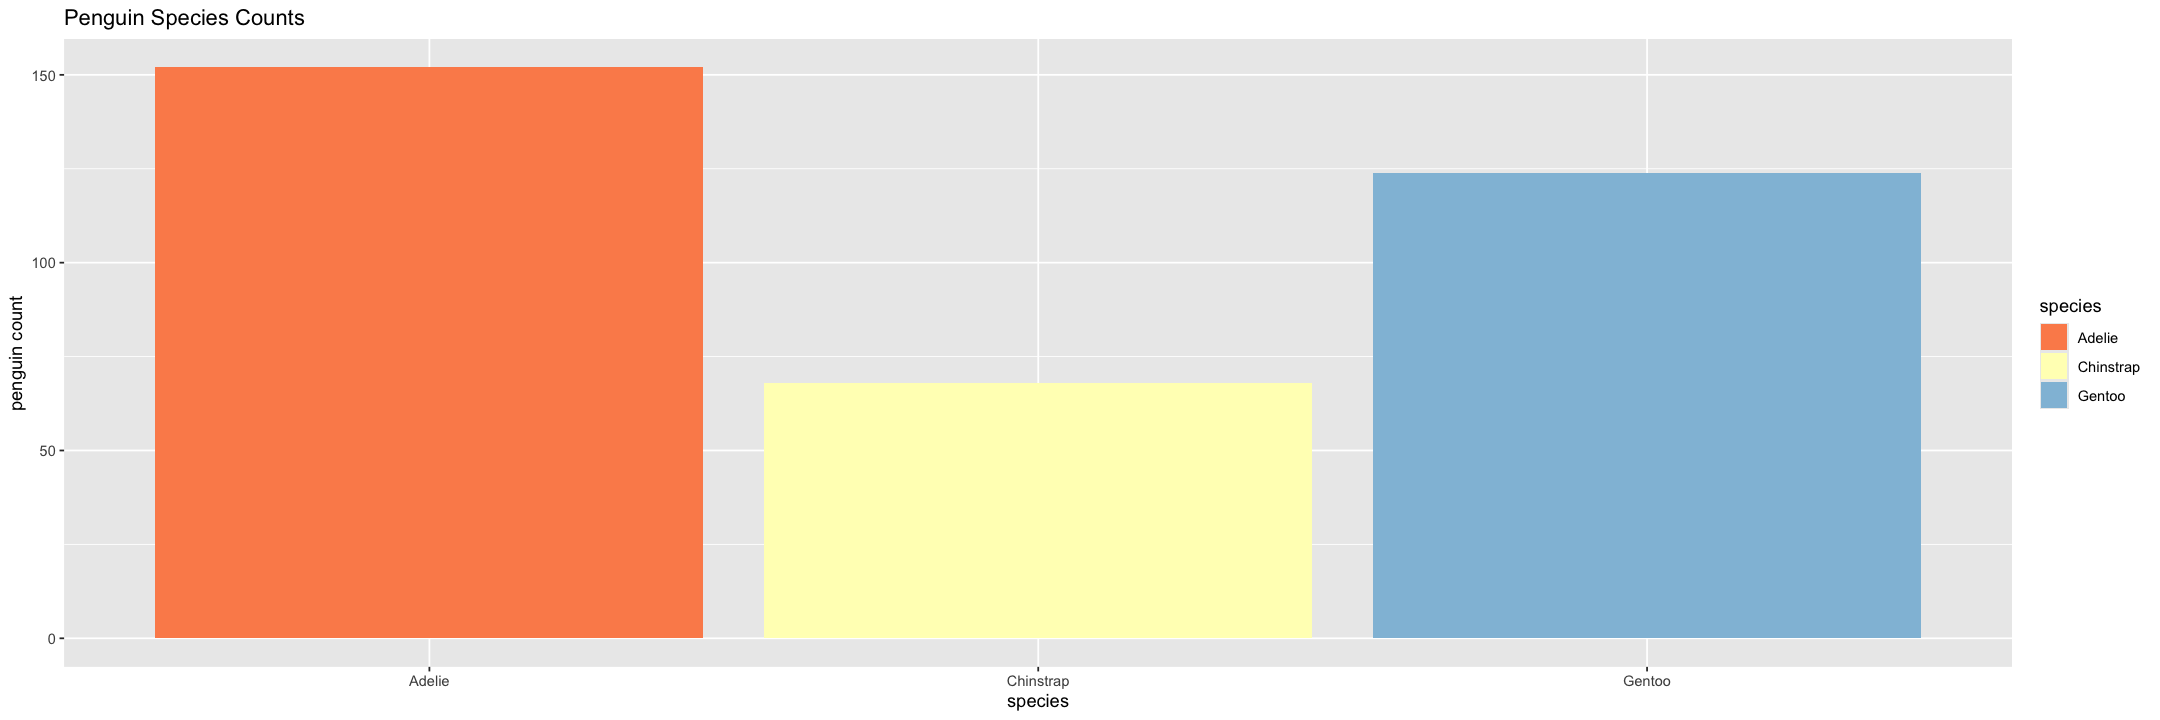

In [46]:
ggplot(penguins, aes(x = species, fill = species)) +
  geom_bar() +
  labs(
    title = "Penguin Species Counts", align="center",
    y = "penguin count"
  ) +
  # theme_minimal() +
  scale_fill_brewer(palette = "RdYlBu")

# save plot
ggsave("figures/species_counts_barplot.png", width = 18, height = 6)

## Data Cleansing and Preprocessing
This section collections metrics about the fields, and performs data cleaning and transformation steps that are needed to make the data easier to work with.

### Dataset Metrics
The horizontal bar char below contains high-level metrics such as the number of discrete and continuous columns, all missing columns, complete rows, and missing observations.

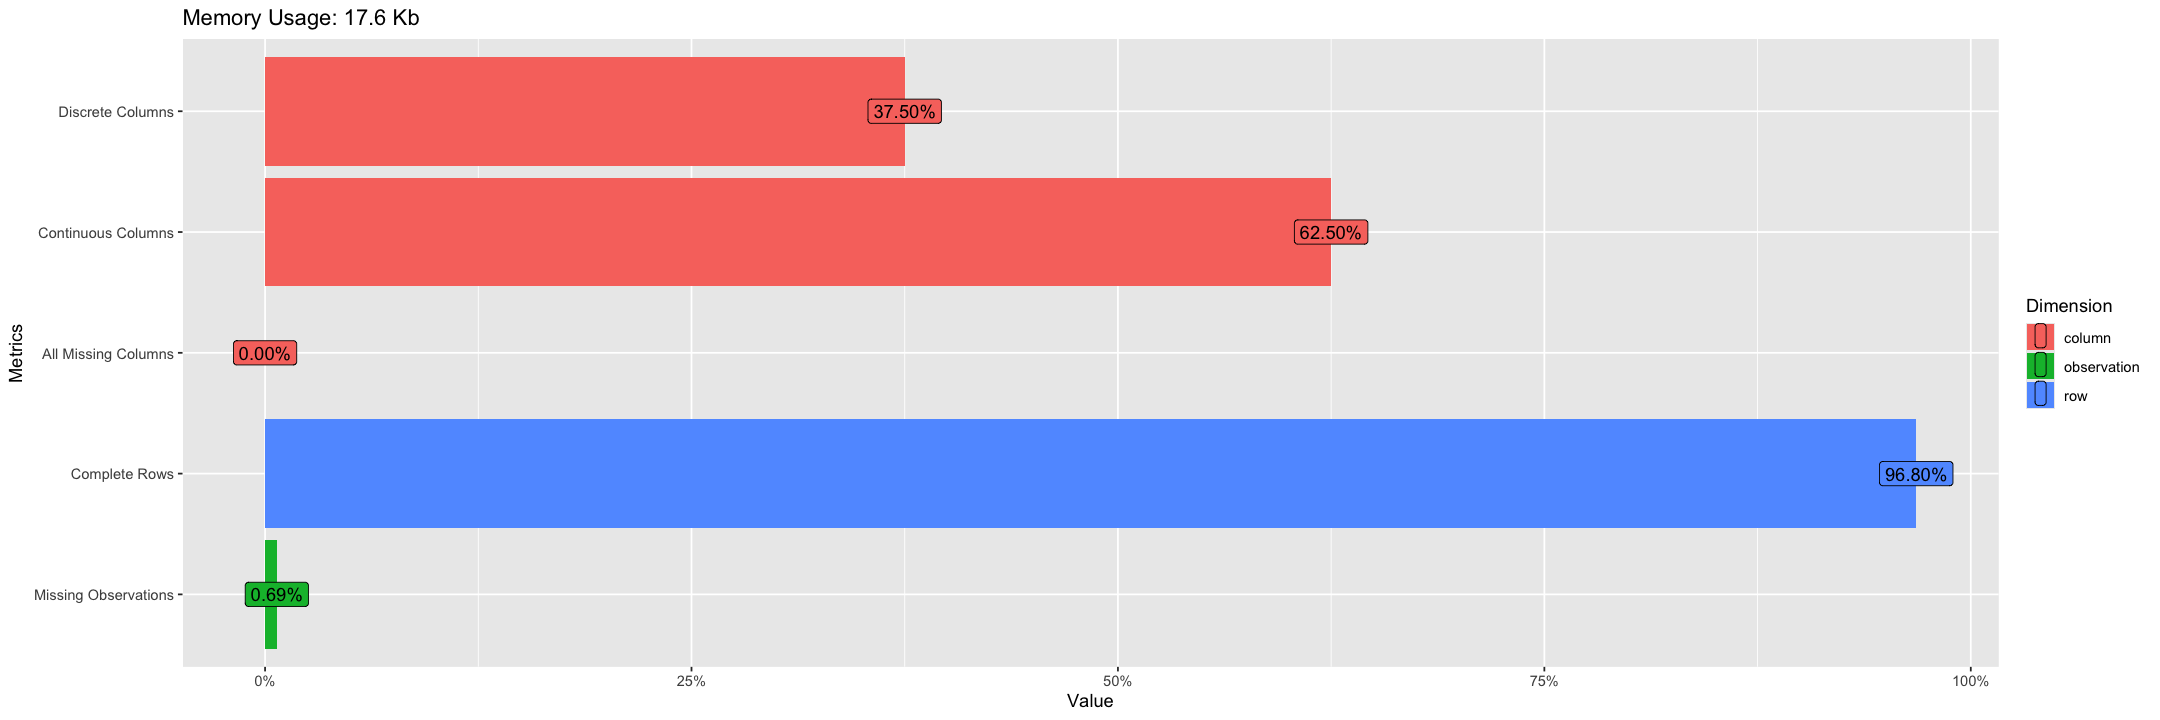

In [14]:
plot_intro(penguins)

# save plot
ggsave("figures/dataset_metrics.png", width = 18, height = 6)

### Missing Data
Thes counts help us get a sense of how much data is missing and where the data are missing in the dataset.

In [47]:
message("total records:")
nrow(penguins)

message("record with missing values:")
sum(!complete.cases(penguins))

message("complete records:")
sum(complete.cases(penguins))

total records:



[1] 344

record with missing values:



[1] 11

complete records:



[1] 333

**NOTE:**  
There are 333 complete records that are not missing any values, and 11 records that are missing at least one data point.

#### Previewing missing data
This is looking exclusively at records where there is a missing, `NA` value.

In [49]:
penguins |>
  filter(if_any(everything(), is.na))

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>
Adelie,Torgersen,44.45,17.3,197,4050,NA,2007
Adelie,Torgersen,34.10,18.1,193,3475,NA,2007
Adelie,Torgersen,42.00,20.2,190,4250,NA,2007
Adelie,Torgersen,37.80,17.1,186,3300,NA,2007
Adelie,Torgersen,37.80,17.3,180,3700,NA,2007
Adelie,Dream,37.50,18.9,179,2975,NA,2007
Gentoo,Biscoe,44.50,14.3,216,4100,NA,2007
Gentoo,Biscoe,46.20,14.4,214,4650,NA,2008
Gentoo,Biscoe,47.30,13.8,216,4725,NA,2009


We can see that a lot of records are missing `sex`, and there are a view records that are missing data for of the body measurement metrics.

#### Missing values by variable
The `gg_miss_var()` function visualizes the number of missing values for each variable in the dataset, helping identify which fields require cleaning and where potential gaps in the analysis may exist.

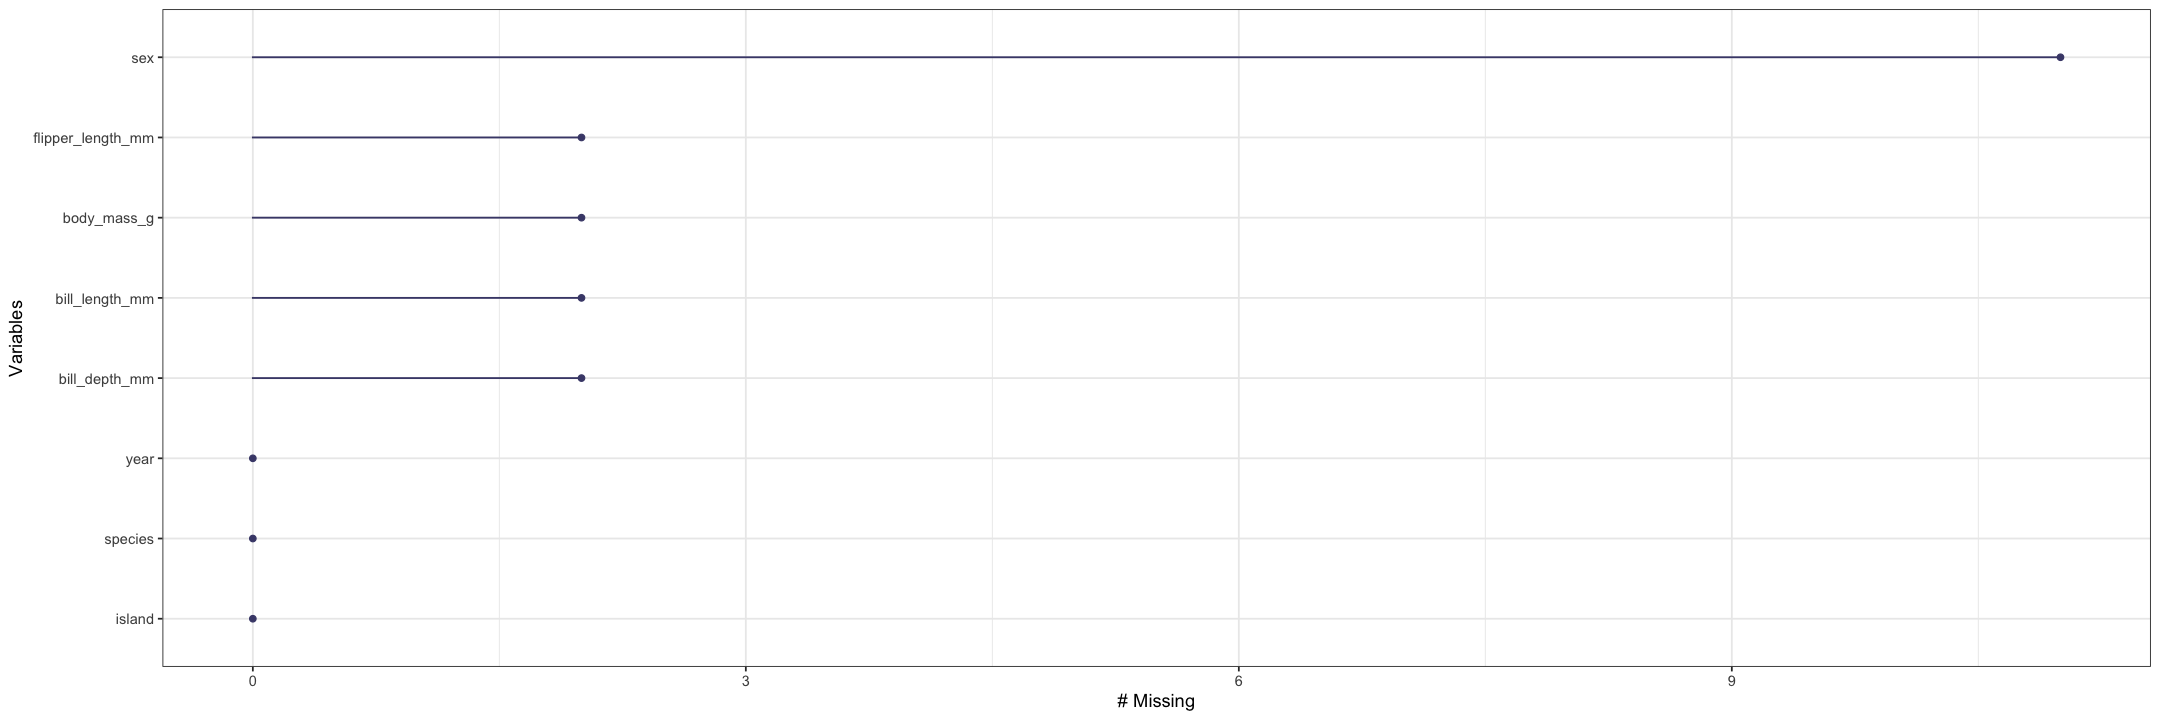

In [29]:
gg_miss_var(penguins) + theme_bw()

# save plot
ggsave("figures/missing_values_by_variable.png", width = 18, height = 6)

### Imputing Missing Values
There are two records for each numeric variable that are missing values, so instead of removing those from the analysis, we can calculate the median for each variable and impute the missing value with the median.

In [41]:
# capture the median for each of the numeric variables
median_flipper_length <- median(penguins$flipper_length_mm, na.rm = TRUE)
median_body_mass <- median(penguins$body_mass_g, na.rm = TRUE)
median_bill_length <- median(penguins$bill_length_mm, na.rm = TRUE)
median_bill_depth <- median(penguins$bill_depth_mm, na.rm = TRUE)

# impute the median where the values are missing (2 records missing a value for each numeric field)
penguins <- penguins |>
  mutate(
    flipper_length_mm = ifelse(is.na(flipper_length_mm), median_flipper_length, flipper_length_mm),
    body_mass_g = ifelse(is.na(body_mass_g), median_body_mass, body_mass_g),
    bill_length_mm = ifelse(is.na(bill_length_mm), median_bill_length, bill_length_mm),
    bill_depth_mm = ifelse(is.na(bill_depth_mm), median_bill_depth, bill_depth_mm)
  )

### Interpretations
**Bill Depth**  
The Adelie and Chinstrap penguin species have a very similar bill depth, with a little more variability within the Chinstrap species. The Gentoo species have more shallow bills on average, setting them apart from the other two species.

**Bill Length**  
The Adelie species has a much smaller bill length on average, than the Chinstrap and Gentoo species. The Chinstrap species tends to have slightly longer bill length and a little bit more variability than the Gentoo species.

**Body Mass**  
The Adelie and Chinstrap species have the same average body mass, while the Gentoo penguin species has a much higher body mass on average. The body mass of Gentoo penguins tends to fluxuate more than the other species in the study.

**Flipper Length**  
The Gentoo species also has a much higher flipper length than the Adelie and Chinstrap species of penguins, with the Adelie species having the lowest flipper lengths on average between the three groups.

## Temporal and Geographic Distribution
#### Which years are covered in the dataset?

In [17]:
cat("Distinct Years in the Penguins Dataset:\n")
print(penguins |> distinct(year) |> pull(year))

Distinct Years in the Penguins Dataset:
[1] 2007 2008 2009


### Which species are on which islands?

In [18]:
cat("Number of Penguins per Species on each Island:")
print(penguins |>
  group_by(species, island) |>
  count())

Number of Penguins per Species on each Island:# A tibble: 5 × 3
# Groups:   species, island [5]
  species   island        n
  <fct>     <fct>     <int>
1 Adelie    Biscoe       44
2 Adelie    Dream        56
3 Adelie    Torgersen    52
4 Chinstrap Dream        68
5 Gentoo    Biscoe      124


### Species distribution by island and year

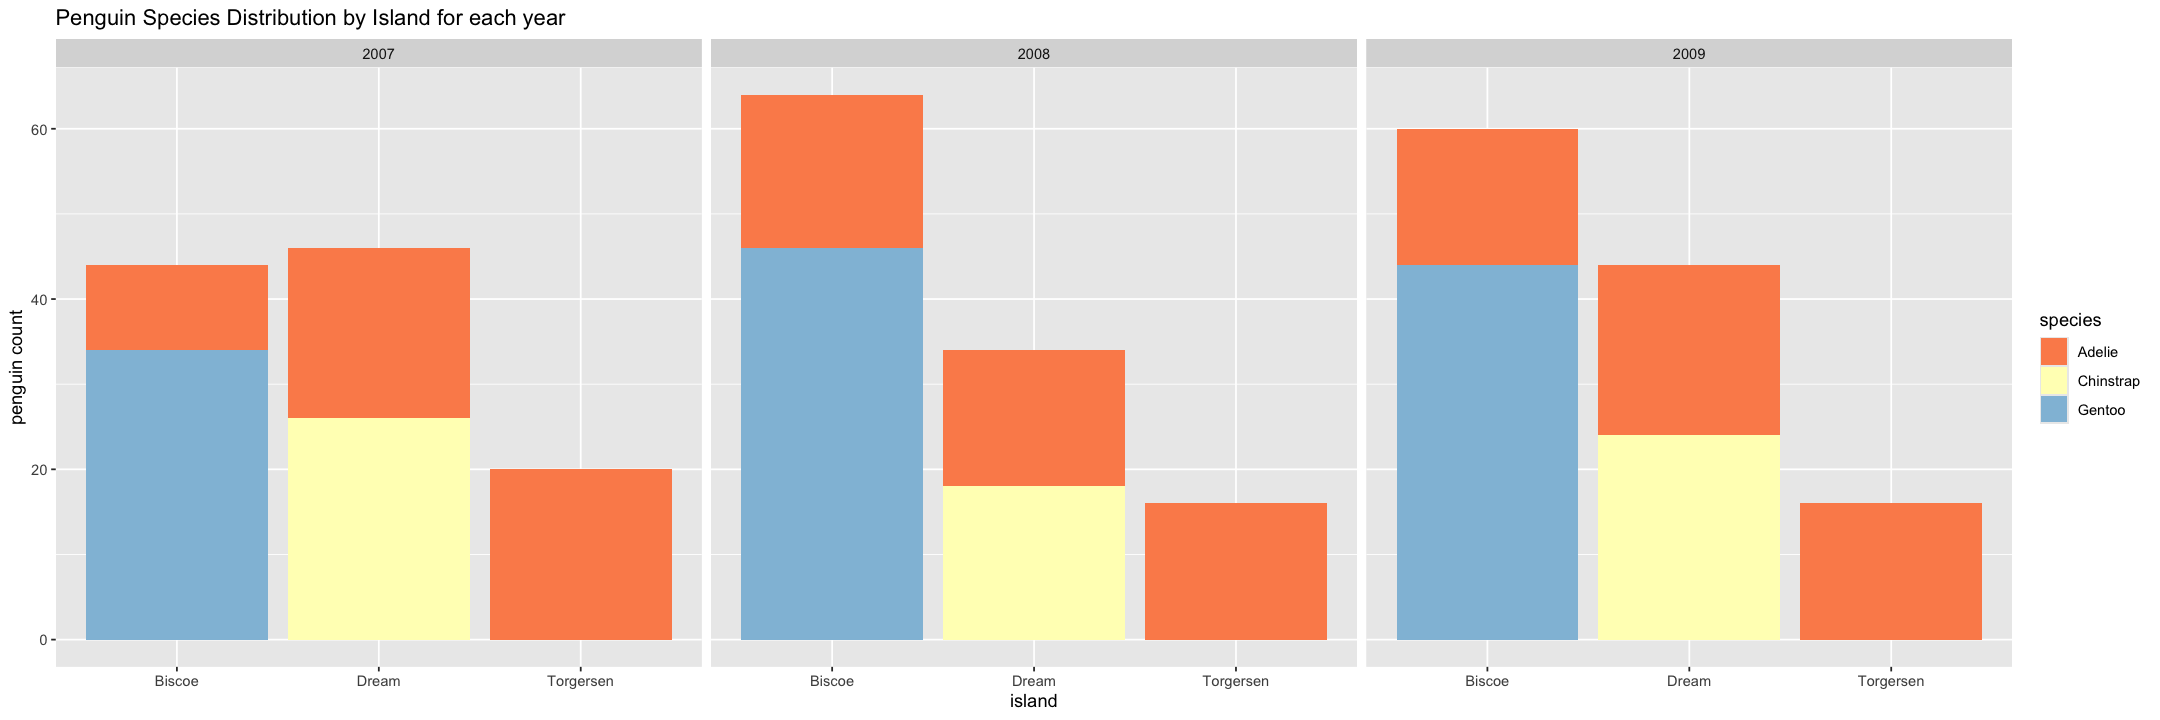

In [44]:
ggplot(penguins, aes(x = island, fill = species)) +
  geom_bar() +
  labs(
    title = "Penguin Species Distribution by Island for each year", align="center",
    y = "penguin count"
  ) +
  # theme_minimal() +
  facet_wrap(~year) +
  scale_fill_brewer(palette = "RdYlBu")

# save plot
ggsave("figures/species_by_island_year_barplot.png", width = 18, height = 6)

This bar graph looks at the three penguin species distributed across 3 islands: Biscoe, Dream and Torgersen. The Adelie penguins are the only species to inhabit all 3 islands, and the only penguin species of the three groups to inhabit the island of Torgersen. Both Adelie and Gentoo can be found on the island of Biscoe and both Adelie and Chinstrap can be found on Dream.

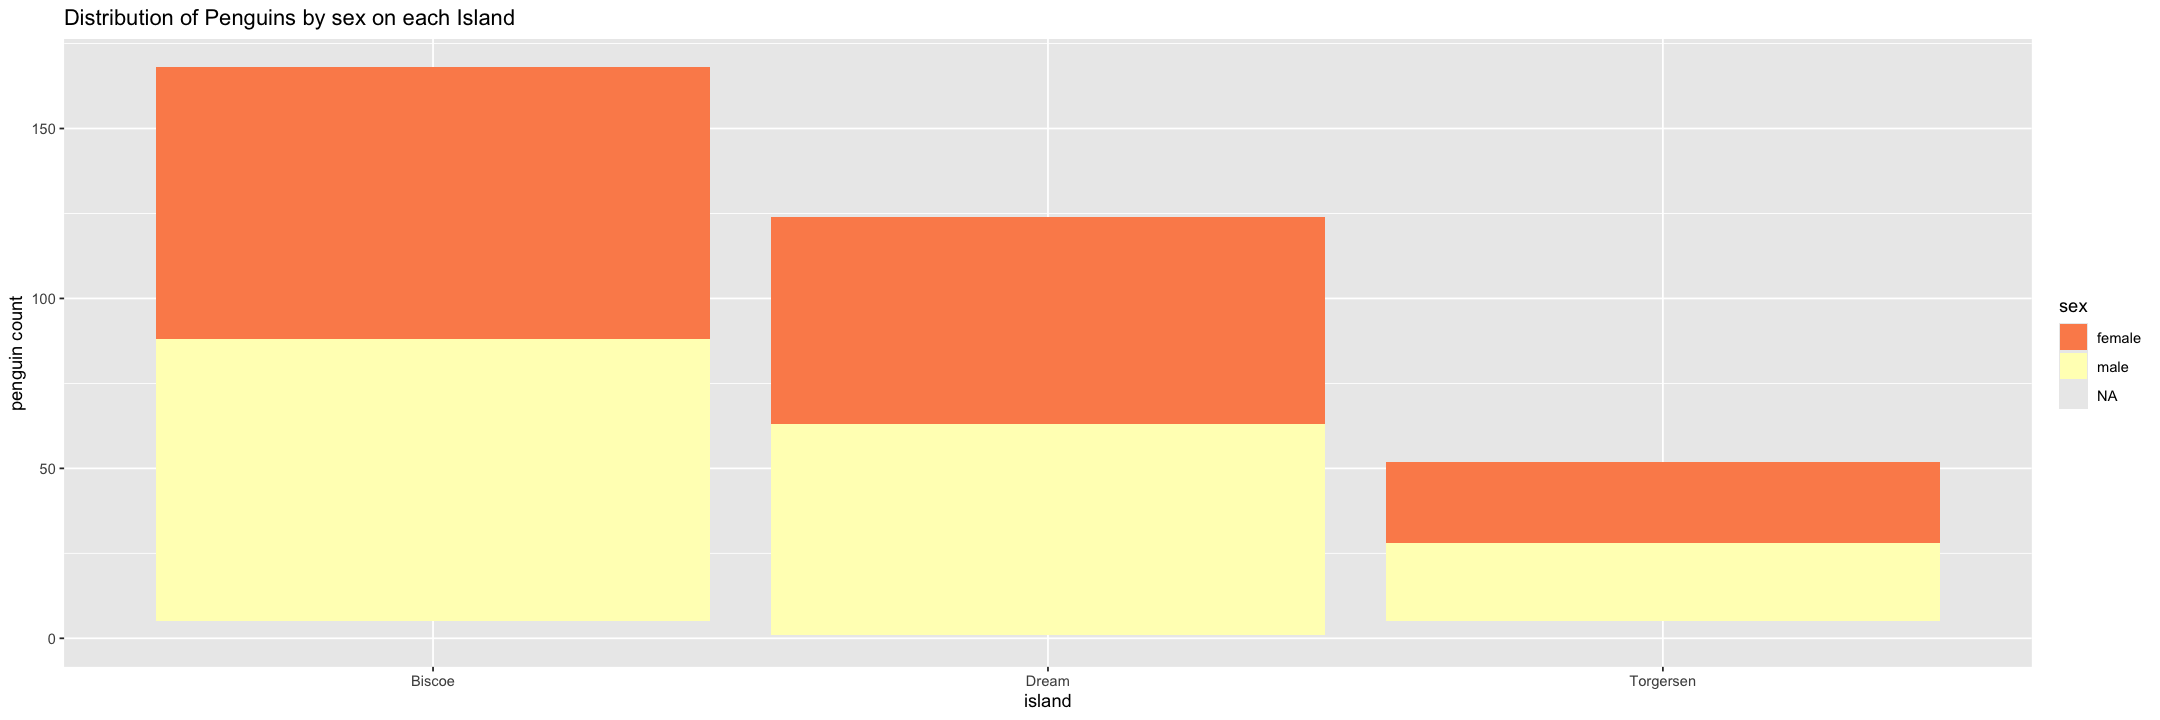

In [17]:
ggplot(penguins, aes(x = island, fill = sex)) +
  geom_bar() +
  labs(
    title = "Distribution of Penguins by sex on each Island", align="center",
    y = "penguin count"
  ) +
  # theme_minimal() +
  scale_fill_brewer(palette = "RdYlBu")

# save plot
ggsave("figures/penguin_sex_distribution_barplot.png", width = 18, height = 6)

There are roughly the same number of male and female penguins on all 3 islands in the study.

## Exploratory Analysis
### Visualizing Feature Relationships by Species
The boxplots display the range, median, and variability of each physical measurement, broken down by species to reveal distinctive patterns across the groups.

NOTE: in order to visualize the data using boxplots, we need to reshape the data using `pivot_longer()` so we can look at boxplots for all the different numeric variables, as opposed to just one.

Warning message:
“Removed 8 rows containing non-finite outside the scale range (`stat_boxplot()`).”
Warning message:
“Removed 8 rows containing non-finite outside the scale range (`stat_boxplot()`).”


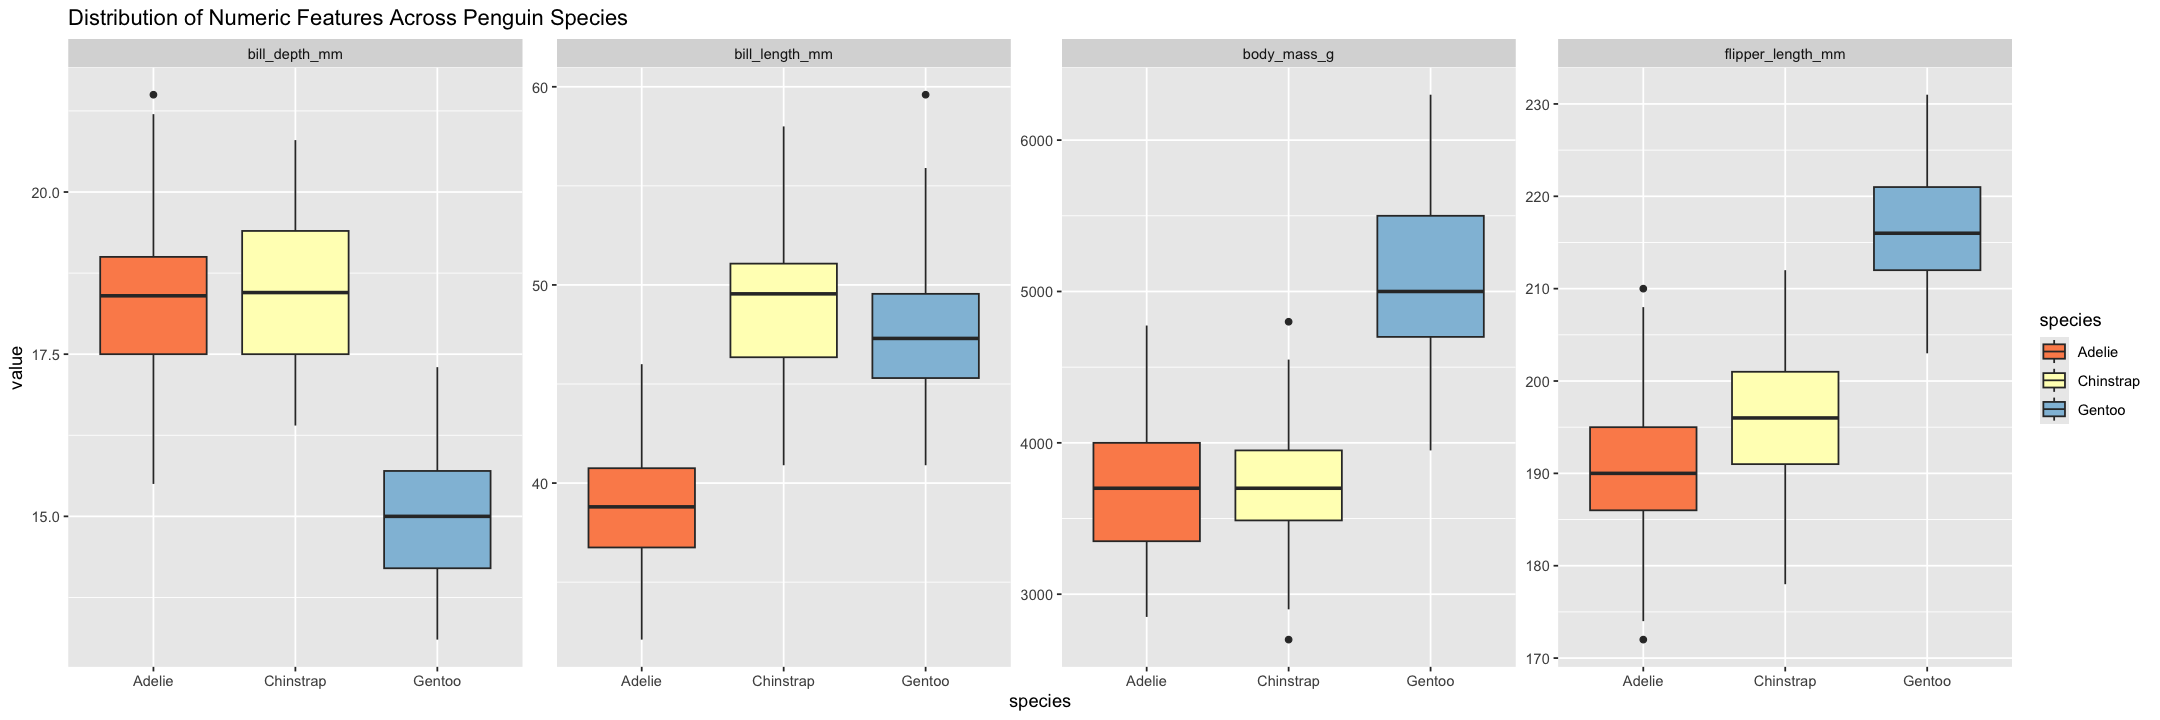

In [11]:
# converts the data into a longer table
penguins_long <- penguins |>
  pivot_longer(
    cols = where(is.numeric) & !c(year), 
    names_to = "variable", # new column to store original column names
    values_to = "value" # new column to store original column values
  )
# create boxplots
ggplot(penguins_long, aes(x = species, y = value, fill = species)) +
  geom_boxplot() +
  labs(
      title = "Distribution of Numeric Features Across Penguin Species"
  ) +
  # geom_jitter() +
  facet_wrap(~variable, 
             scales = "free_y", # give each variable it's own y-axis
             ncol = 4 # make the plots 1x4
  ) +
  # theme_minimal() +
  scale_fill_brewer(palette = "RdYlBu")

# save plot
ggsave("figures/species_distribution_boxplot.png", width = 18, height = 6)

### Histogram for numeric variables
These histograms show the distribution of individual physical traits, with separate plots for each species to highlight how measurements vary within and across groups.

Warning message:
“Removed 8 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 8 rows containing non-finite outside the scale range (`stat_bin()`).”


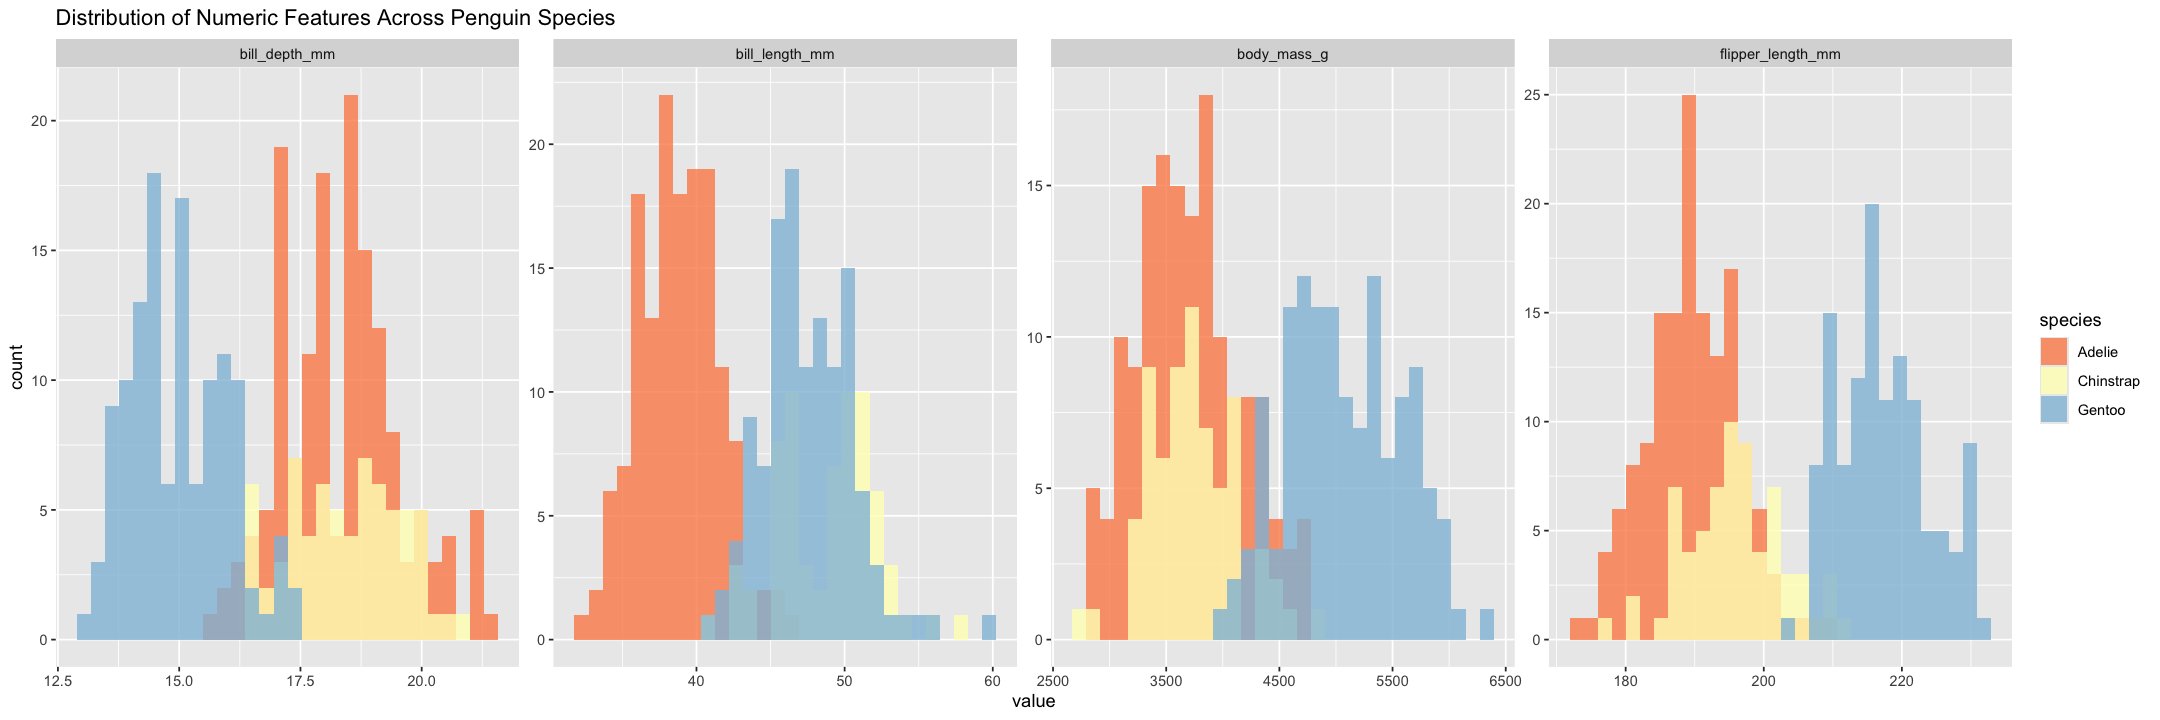

In [12]:
# create histograms for each numeric variable
ggplot(penguins_long, aes(x = value, fill = species)) +
  geom_histogram(bins = 30, alpha = 0.8, position = "identity") +
  labs(
      title = "Distribution of Numeric Features Across Penguin Species"
  ) +
  facet_wrap(~variable, 
             scales = "free", # give each variable it's own y-axis
             ncol = 4 # make the plots 1x4
  ) +
  # theme_minimal() +
  scale_fill_brewer(palette = "RdYlBu")

# save plot
ggsave("figures/species_distribution_barplot.png", width = 18, height = 6)

## Correlations
### Correlation Matrix of Numeric Variables
This visualization shows how the numeric features in the dataset correlate with one another.

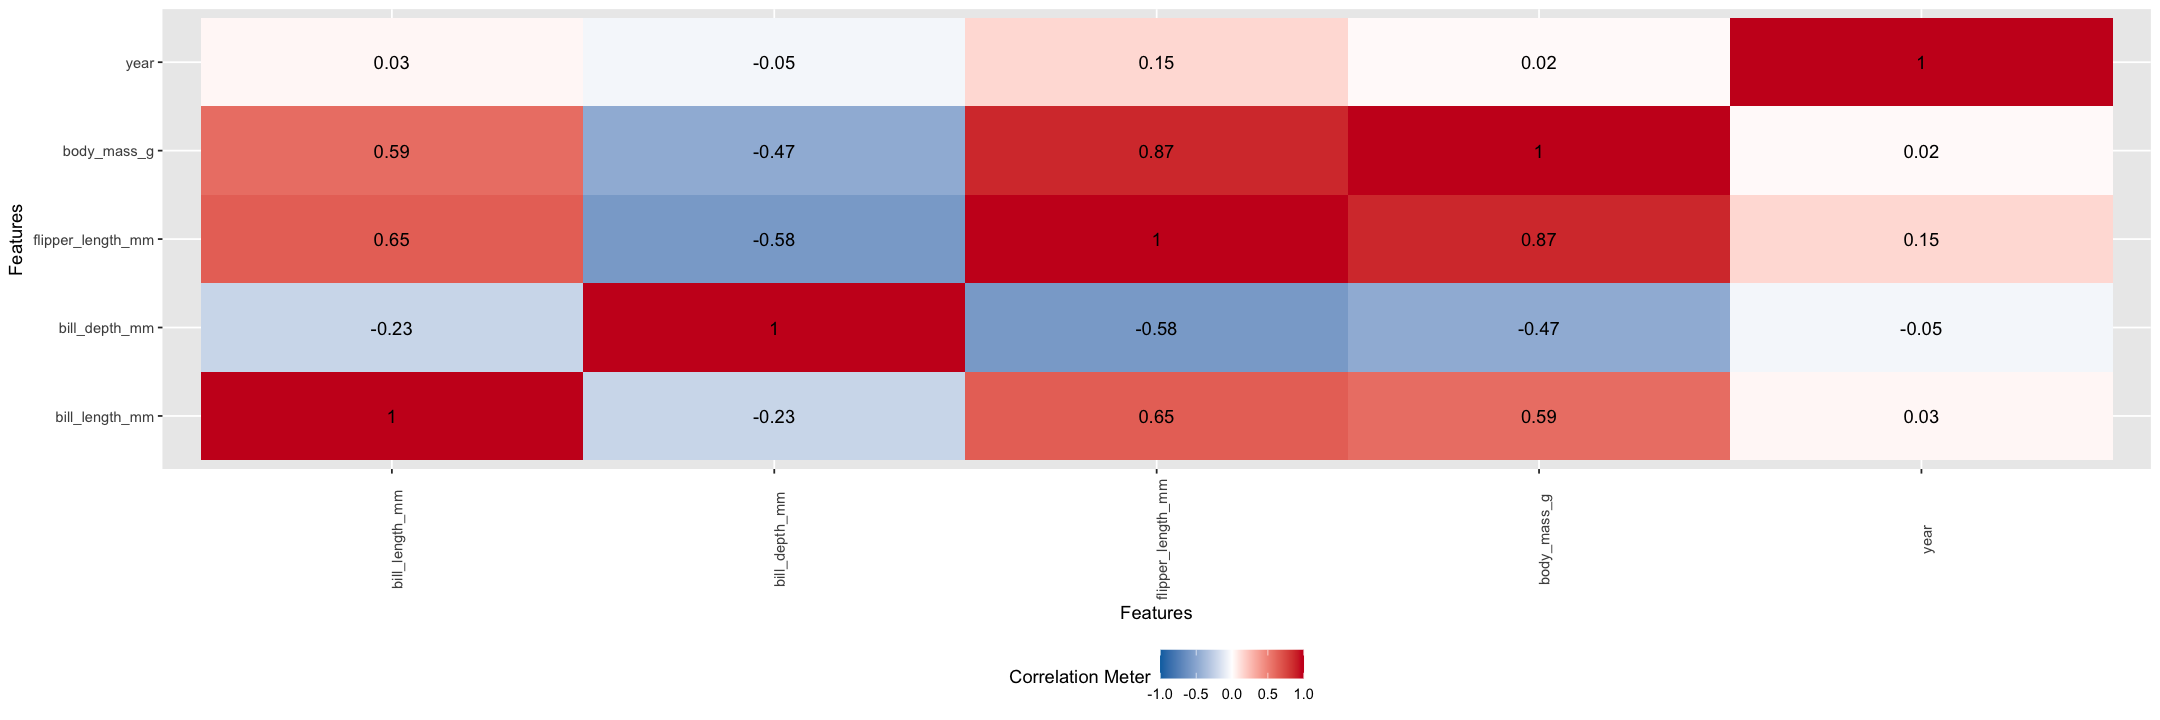

In [18]:
penguins_numeric <- penguins|> 
  na.omit(sex) |> # without removing the NAs, the correlation calculations get messed up
  select(where(is.numeric))

plot_correlation(penguins_numeric)

# save plot
ggsave("figures/correlation_matrix.png", width = 18, height = 6)

In [38]:
# could also see the correlation matrix values with this, but it's harder to read
cor_matrix <- cor(penguins_numeric, use = "complete.obs")
# print(cor_matrix)

### Interpretations
The correlation matrix above shows how different metrics within the dataset are correlated with each other. The color scale indicates:
- positive correlation - red
- low/ no correlation - white
- negative correlation - blue
The darker the boxes, the stronger the correlation. The boxes where the variable is being correlated with itself are always going to be a strong positive correlation with the value of 1, which can be ignored from the analysis.

According to the correlation matrix, there are strong correlations between the following numeric variables:
- `body_mass_g` and `flipper_length_mm`

There are moderate correlations between:
- `bill_length_mm` and `flipper_length_mm`
- `bill_length_mm` and `body_mass_g`
- `bill_depth_mm` and `flipper_length_mm`
- `bill_depth_mm` and `body_mass_g`

#### Visualizing the relationship between `body_mass_g` vs `flipper_length_mm`

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


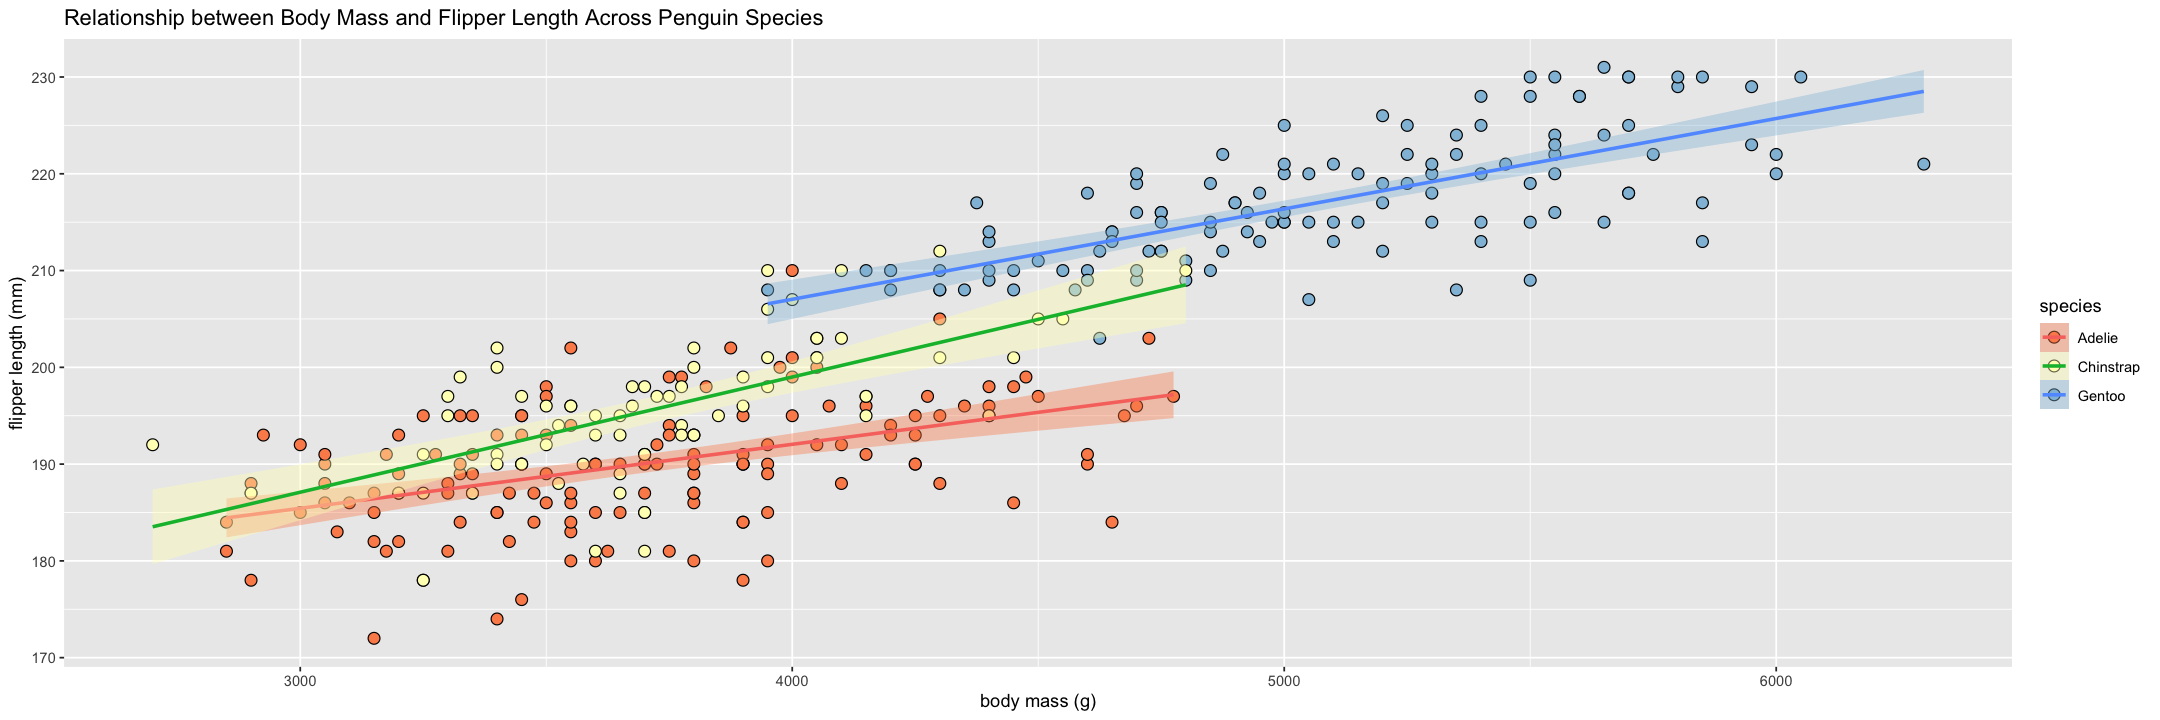

In [19]:
penguins |>
 na.omit(body_mass_g) |> # filtering out two records missing data
ggplot(aes(x = body_mass_g, y = flipper_length_mm, fill = species)) +
geom_point(size = 3, shape = 21) + # a hack so I can keep the color palette consistent
geom_smooth(method = "lm", aes(color = species)) +
labs(
  title = "Relationship between Body Mass and Flipper Length Across Penguin Species",
  x = "body mass (g)",
  y = "flipper length (mm)"
) +
# theme_minimal() +
scale_fill_brewer(palette = "RdYlBu")

# save plot
ggsave("figures/body_mass_by_flipper_length.png", width = 18, height = 6)

All three species of penguins show a positive relationship between body mass and flipper length, meaning that the higher the body mass of the penguin, the more likely the penguin is to have longer flipper length.

#### Visualizing the relationship between `bill_length_mm` vs `flipper_length_mm`

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


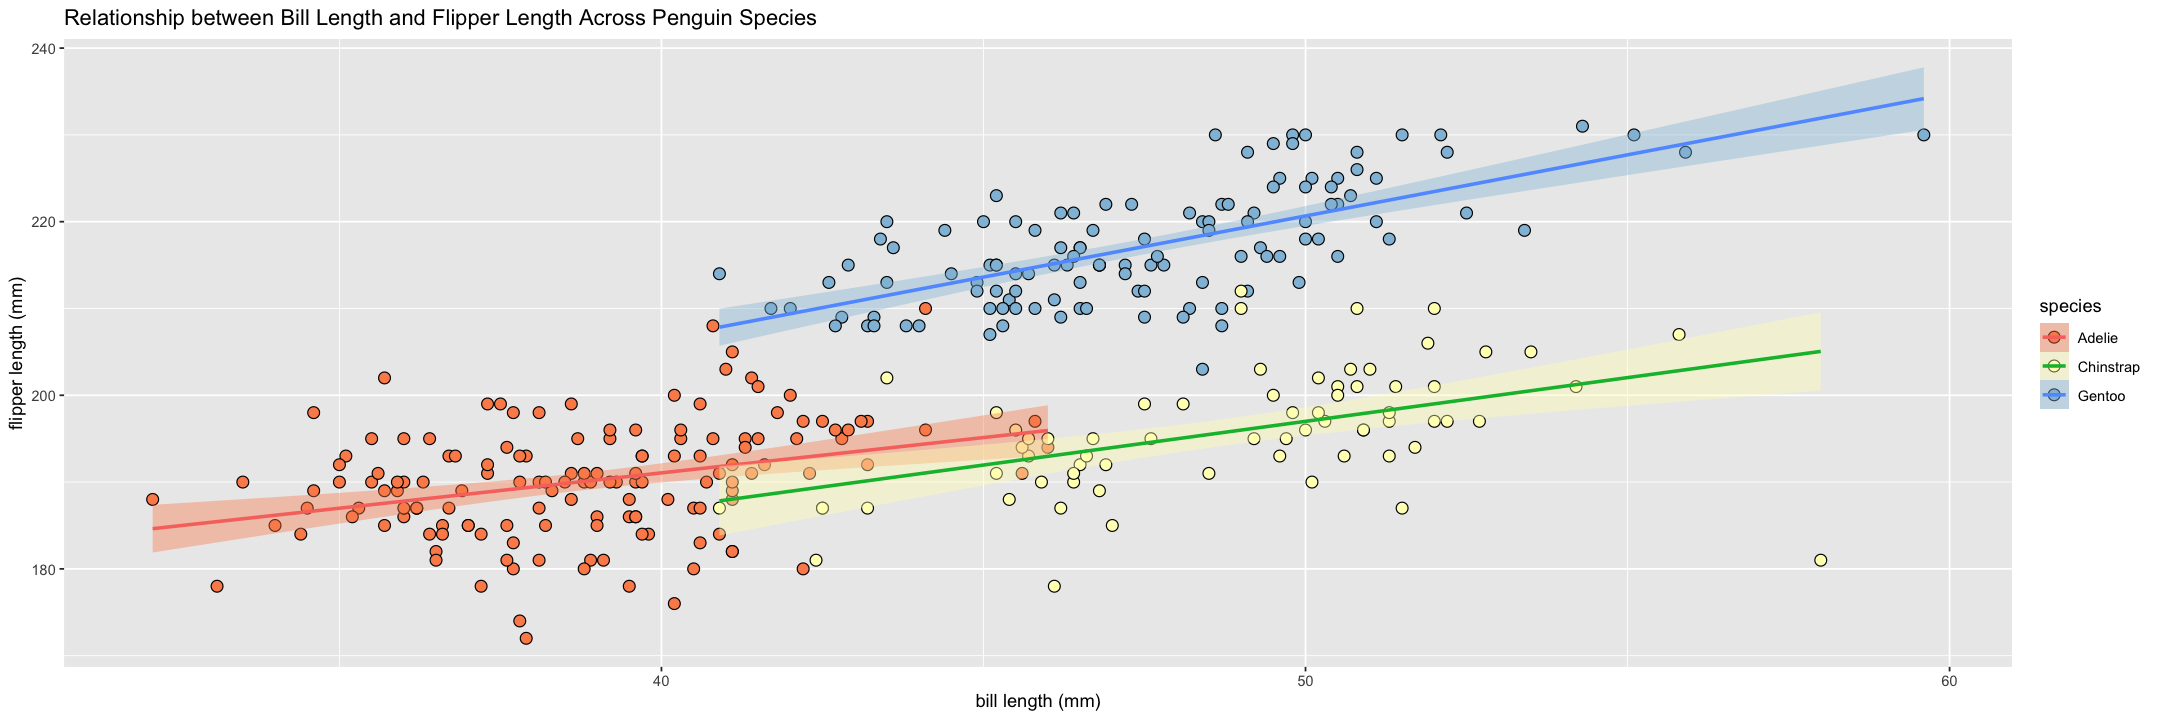

In [20]:
penguins |>
 na.omit(bill_length_mm) |> # filtering out two records missing data
ggplot(aes(x = bill_length_mm, y = flipper_length_mm, fill = species)) +
geom_point(size = 3, shape = 21) + # a hack so I can keep the color palette consistent
geom_smooth(method = "lm", aes(color = species)) +
labs(
  title = "Relationship between Bill Length and Flipper Length Across Penguin Species",
  x = "bill length (mm)",
  y = "flipper length (mm)"
) +
# theme_minimal() +
scale_fill_brewer(palette = "RdYlBu")

# save plot
ggsave("figures/bill_length_by_flipper_length.png", width = 18, height = 6)

All three species of penguins show a slightly positive relationship between bill length and flipper length, indicating that penguins will a longer bill length might have slightly longer flipper length as well.

#### Visualizing the relationship between `bill_depth_mm` vs `flipper_length_mm`

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


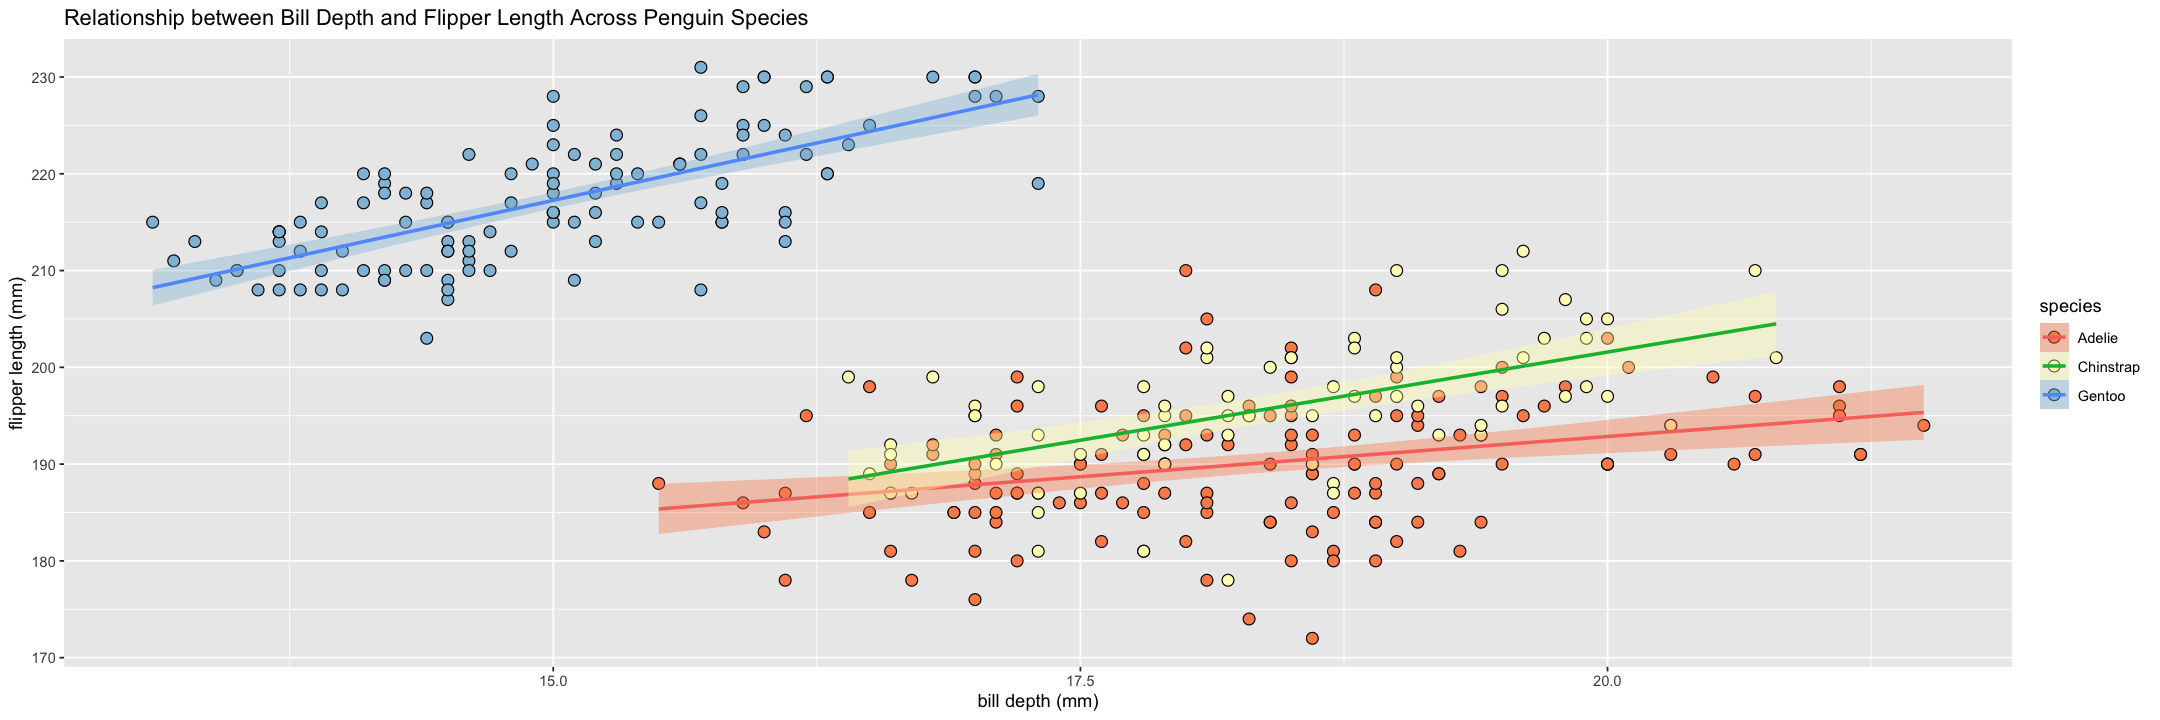

In [21]:
penguins |>
 na.omit(bill_depth_mm) |> # filtering out two records missing data
ggplot(aes(x = bill_depth_mm, y = flipper_length_mm, fill = species)) +
geom_point(size = 3, shape = 21) + # a hack so I can keep the color palette consistent
geom_smooth(method = "lm", aes(color = species)) +
labs(
  title = "Relationship between Bill Depth and Flipper Length Across Penguin Species",
  x = "bill depth (mm)",
  y = "flipper length (mm)"
) +
# theme_minimal() +
scale_fill_brewer(palette = "RdYlBu")

# save plot
ggsave("figures/bill_depth_by_flipper_length.png", width = 18, height = 6)

The positive relationship between the points on the scatterplot for each penguin species, indicates that if the penguin has a longer the bill depth, it is somewhat likely to also have a longer flipper length. This is the most true for the Gentoo penguins who have the strongest relationship between bill depth and flipper length. This relationship is less pronouned for the Adelie penguins.

#### Visualizing the relationship between `bill_depth_mm` vs `body_mass_g`

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


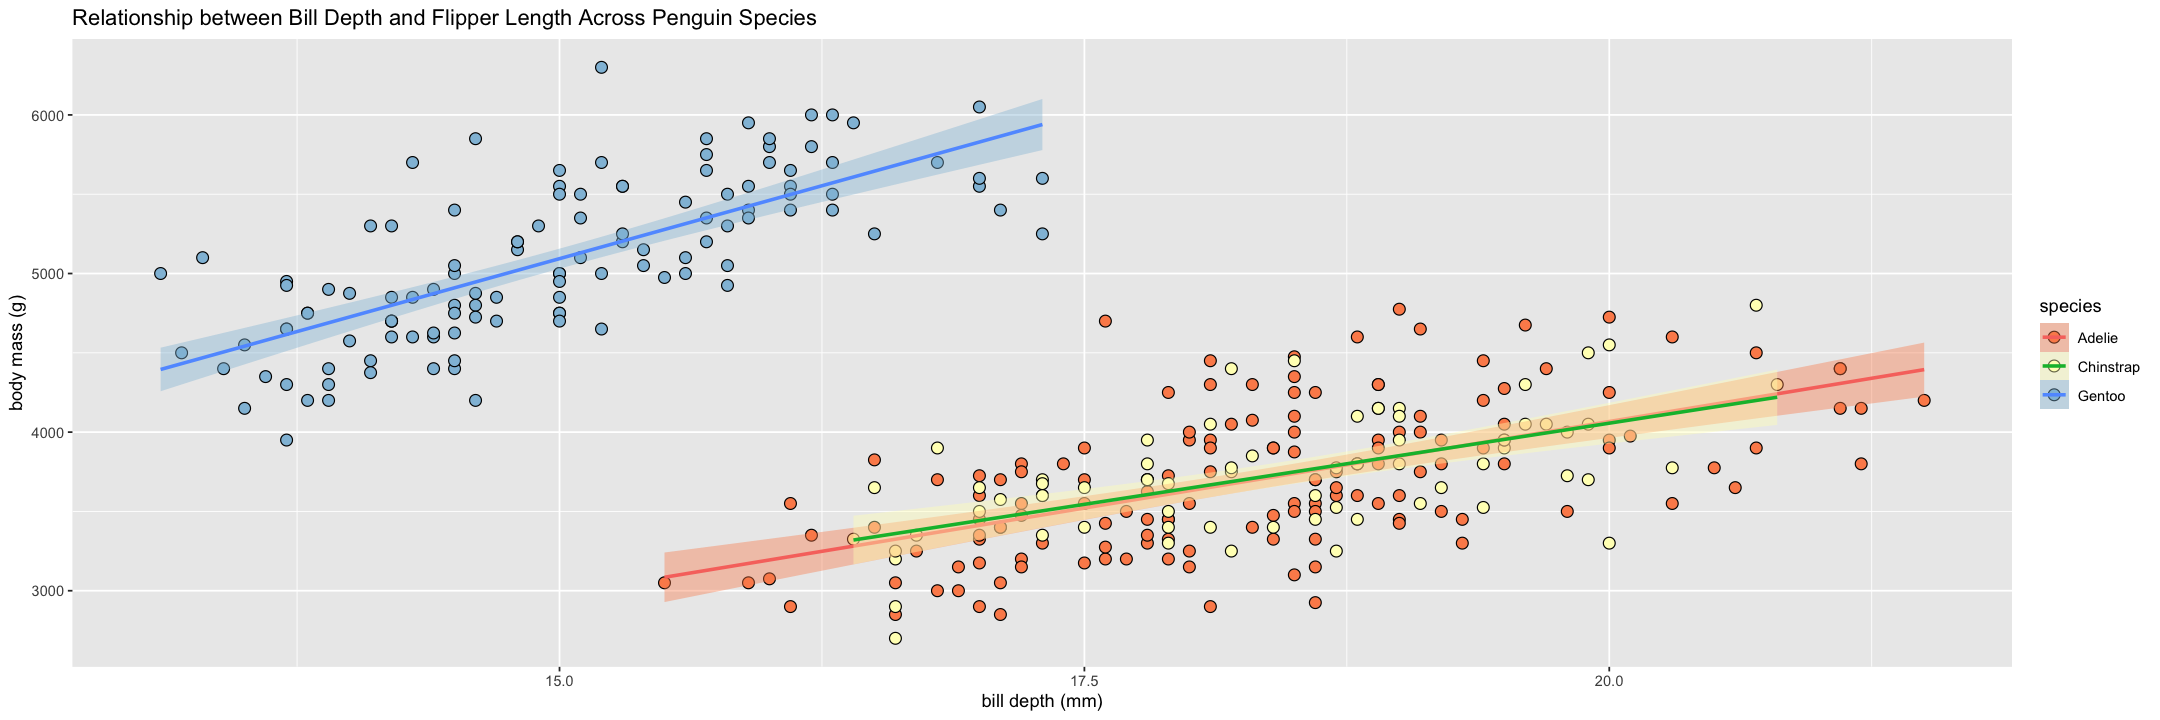

In [22]:
penguins |>
 na.omit(bill_depth_mm) |> # filtering out two records missing data
ggplot(aes(x = bill_depth_mm, y = body_mass_g, fill = species)) +
geom_point(size = 3, shape = 21) + # a hack so I can keep the color palette consistent
geom_smooth(method = "lm", aes(color = species)) +
labs(
  title = "Relationship between Bill Depth and Flipper Length Across Penguin Species",
  x = "bill depth (mm)",
  y = "body mass (g)"
) +
# theme_minimal() +
scale_fill_brewer(palette = "RdYlBu")

# save plot
ggsave("figures/bill_depth_by_body_mass.png", width = 18, height = 6)

There is a positive relationship between bill depth and body mass, indicating for all 3 penguin species, the longer their bill depth, the higher their body mass. 

## Summary of Findings
The following summarizes the main findings from the exploratory analysis of the Palmer Penguins dataset.

### Distribution by Island and Sex:
- Adelie penguins reside on all 3 islands: Biscoe, Dream and Torgersen, while the Gentoo penguins are only on Biscoe and the Chinstrap penguins are only on the Dream island.
- There is roughly the same number of male and female penguins on each island.

### Traits per Species:
- The Gentoo penguins have a much shorter bill depth compared to the Adelie and Chinstrap penguins
- The Adelie penguins have a much smaller bill length compared to the Gentoo and Chinstrap penguins
- The Gentoo penguins tend to have a much higher body mass than the other two penguin species
- The Gentoo penguins also have a much larger average flipper length compared to the othe two penguins

### Feature Relationships:
- There is a strong positive relationship between flipper length and body mass, indicating that penguins with higher body mass also have longer flippers.
- There are also moderate correlations between the penguin's bill depth and bill length, which indicate their features likely scale together.